In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.extensions import Initialize
from math import sqrt, pi
import numpy as np
from time import sleep
from IPython.display import display, clear_output

In [2]:
# As Bahman suggested: A combination of the 'static' animation and Rafieh's
# linspace approach, resulting in a more dynamic animation:
# animate_1  : either 1-parameter gate, to be specified in the input
# animate_u2 : the U2-gate
# animate_u3 : the U3-gate

In [3]:
# some states to start with
zero = [1, 0]
one = [0, 1]
plus = [1/sqrt(2), 1/sqrt(2)]
minus = [1/sqrt(2), -1/sqrt(2)]

# and some alternatives
yyy = [1/sqrt(2), complex(0,1/sqrt(2))]
pyth = [0.8, 0.6]
zero2 = [-1, 0]
zero3 = [complex(0, 1), 0]        # 
zero4 = [complex(0, -1), 0]       #
zero5 = [complex(0.8, 0.6), 0]    #

plus2 = [-1/sqrt(2), -1/sqrt(2)]
plus3 = [complex(0,1/sqrt(2)), complex(0,-1/sqrt(2))]

In [4]:
# and some gates
rx = qiskit.circuit.quantumcircuit.QuantumCircuit.rx
ry = qiskit.circuit.quantumcircuit.QuantumCircuit.ry
rz = qiskit.circuit.quantumcircuit.QuantumCircuit.rz
u1 = qiskit.circuit.quantumcircuit.QuantumCircuit.u1

u2 = qiskit.circuit.quantumcircuit.QuantumCircuit.u2

u3 = qiskit.circuit.quantumcircuit.QuantumCircuit.u3

In [5]:
def get_bloch_1(phi, init=[1,0], gate=QuantumCircuit.ry):
    circuit = QuantumCircuit(1, 1)
    circuit.append(Initialize(init), [0])
    gate(circuit, phi, 0)
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend=simulator).result()
    statevector = result.get_statevector()
    return plot_bloch_multivector(statevector)

In [6]:
def animate_1(final_angle, init=[1,0], gate=QuantumCircuit.ry, steps=20):

    p = np.linspace(0,final_angle, steps)

    for angle in p:
        clear_output(wait=True)
        fig = get_bloch_1(angle, init=init, gate=gate)
        display(fig)
        sleep(0.1)

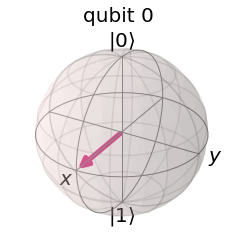

In [7]:
animate_1(0.5*pi, zero, ry, 20)

In [8]:
def get_bloch_u2(phi, rho, init=[1,0]):
    circuit = QuantumCircuit(1, 1)
    circuit.append(Initialize(init), [0])
    circuit.u2(phi, rho, 0)
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend=simulator).result()
    statevector = result.get_statevector()
    return plot_bloch_multivector(statevector)

In [9]:
def animate_u2(final_phi, final_rho, init=[1,0], gate=QuantumCircuit.ry, steps=20):

    p_phi = np.linspace(0,final_phi, steps)
    p_rho = np.linspace(0, final_rho, steps)

    for i in range(steps):
        clear_output(wait=True)
        fig = get_bloch_u2(p_phi[i], p_rho[i], init=init)
        display(fig)
        sleep(0.1)

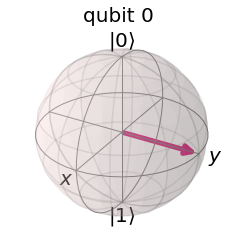

In [10]:
animate_u2(0.5*pi, 0.5*pi, zero)
# this does not seem to start in |0>

In [11]:
def get_bloch_u3(phi, rho, lam, init=[1,0]):
    circuit = QuantumCircuit(1, 1)
    circuit.append(Initialize(init), [0])
    circuit.u3(phi, rho, lam, 0)
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit, backend=simulator).result()
    statevector = result.get_statevector()
    return plot_bloch_multivector(statevector)

In [12]:
def animate_u3(final_phi, final_rho, final_lam, init=[1,0], steps=20):

    p_phi = np.linspace(0, final_phi, steps)
    p_rho = np.linspace(0, final_rho, steps)
    p_lam = np.linspace(0, final_lam, steps)

    for i in range(steps):
        clear_output(wait=True)
        fig = get_bloch_u3(p_phi[i], p_rho[i], p_lam[i], init=init)
        display(fig)
        sleep(0.1)

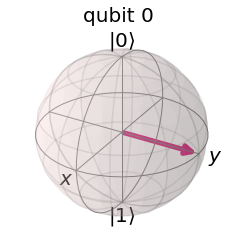

In [13]:
animate_u3(0.5*pi, 0.5*pi, 0.5*pi, zero)